In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
df.shape

(20640, 10)

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

# missing value proportions


In [7]:
columns = df.columns

In [8]:
for column in columns:
    total_missing = df[column].isnull().sum()
    total_count = df[column].shape[0]
    missing_percentage = round( (total_missing / total_count), 2)
    print(f"Missing {missing_percentage * 100} % in {column}")

Missing 0.0 % in longitude
Missing 0.0 % in latitude
Missing 0.0 % in housing_median_age
Missing 0.0 % in total_rooms
Missing 1.0 % in total_bedrooms
Missing 0.0 % in population
Missing 0.0 % in households
Missing 0.0 % in median_income
Missing 0.0 % in median_house_value
Missing 0.0 % in ocean_proximity


# Exploratory data analysis

In [9]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [10]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
value_by_proximity = df.groupby("ocean_proximity")["median_house_value"].mean().reset_index()
px.bar(value_by_proximity, x="ocean_proximity", y="median_house_value", title="Location vise price distribution")

In [12]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
df["housing_median_age"].min()

1.0

In [14]:
df["housing_median_age"].max()

52.0

In [15]:
age_bins = [0, 10, 20, 30, 40, 50, 60]
df["age_bins"] = pd.cut(df["housing_median_age"], bins=age_bins)

In [16]:
df["age_bins"] = df["age_bins"].astype("str")

In [17]:
value_by_age = df.groupby(["age_bins", "housing_median_age"])["median_house_value"].mean().reset_index()
px.bar(value_by_age, x="age_bins", y="median_house_value", color="housing_median_age", title="Price Distribution by age")

In [18]:
value_by_proxnage = df.groupby(["age_bins", "ocean_proximity"])["median_house_value"].mean().reset_index()
px.bar(value_by_proxnage, x="age_bins", y="median_house_value", color="ocean_proximity", title="price by proximity and age")

In [19]:
age_by_proximity = df.groupby("ocean_proximity")["housing_median_age"].mean().reset_index()
px.line(age_by_proximity, x="ocean_proximity", y="housing_median_age", title="proximity wise age")

In [20]:
rooms_by_location = df.groupby("ocean_proximity")["total_rooms"].mean().reset_index()
px.bar(rooms_by_location, x="ocean_proximity", y="total_rooms", title="No of rooms by location")

In [21]:
bins = [0,2,4,6,8,10,12,14]
df["income_bins"] = pd.cut(df["median_income"], bins=bins)

In [22]:
# income_split = df.groupby("income_bins", "ocean_proximity")["median_income"].mean().reset_index()
# px.scatter(income_split, x="income_bins", y="median_bins", color="ocean_proximity", title="income by location")

In [23]:
df["income_bins"].value_counts()

(2, 4]      10096
(4, 6]       5725
(0, 2]       2457
(6, 8]       1672
(8, 10]       382
(10, 12]      195
(12, 14]       56
Name: income_bins, dtype: int64

In [24]:
df["total_rooms"].mean()

2635.7630813953488

In [25]:
df["total_rooms"].max()

39320.0

In [26]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  age_bins income_bins  
0            NEAR BAY  (40, 50]     (8, 10]  
1            NEAR BAY  (20, 30]     (8, 10]  
2            NEAR BAY  (50, 60]      (6, 8]  
3            NEAR BAY  (50, 60]      (4, 6]  
4            NEAR BAY  (50, 60]      (2, 4]  
...               ...       ...         ...  
20635          INLAND  (20, 30]      (0, 2]  
20636          INLAND  (10, 20]      (2, 4]  
20637          INLAND  (10, 20]      (0, 2]  
20638          INLAND  (10, 20]      (0, 2]  
20639          INLAND  (10, 20]      (2, 4]  

[20640 rows x 12 columns]

In [27]:
df["population"]

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20640, dtype: float64

In [28]:
population_by_region = df.groupby("ocean_proximity")["population"].mean().reset_index()
px.bar(population_by_region, x="ocean_proximity", y="population", title="population distribution by region")

In [29]:
px.scatter(df, x="housing_median_age", y="median_house_value", color="ocean_proximity", size="total_rooms", hover_data=["total_bedrooms", "population", "households"])

In [30]:
households_by_location = df.groupby("ocean_proximity")["households"].mean().reset_index()
px.bar(households_by_location, x="ocean_proximity", y="households", title="No of Households by location")

In [31]:
income_by_proximity = df.groupby("ocean_proximity")["median_income"].mean().reset_index()
px.bar(income_by_proximity, x="ocean_proximity", y="median_income", title="Income per locations")

In [32]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

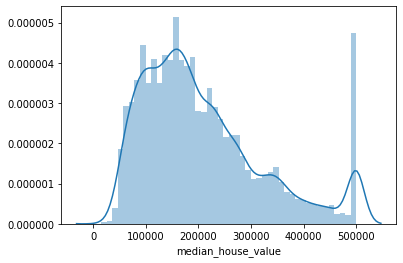

In [33]:
sns.distplot(df["median_house_value"])

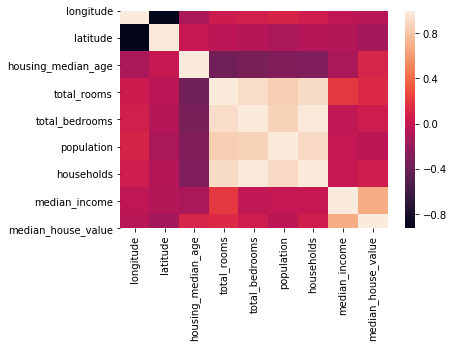

In [34]:
corr = df.corr()
sns.heatmap(corr)

In [35]:
print (corr['median_house_value'].sort_values(ascending=False), '\n')

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64 



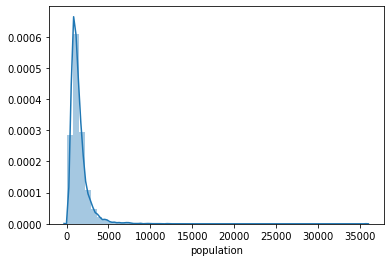

In [36]:
sns.distplot(df["population"])

# feature cleaning

In [37]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  age_bins income_bins  
0            NEAR BAY  (40, 50]     (8, 10]  
1            NEAR BAY  (20, 30]     (8, 10]  
2            NEAR BAY  (50, 60]      (6, 8]  
3            NEAR BAY  (50, 60]      (4, 6]  
4            NEAR BAY  (50, 60]      (2, 4]  
...               ...       ...         ...  
20635          INLAND  (20, 30]      (0, 2]  
20636          INLAND  (10, 20]      (2, 4]  
20637          INLAND  (10, 20]      (0, 2]  
20638          INLAND  (10, 20]      (0, 2]  
20639          INLAND  (10, 20]      (2, 4]  

[20640 rows x 12 columns]

In [38]:
feature_df = df.drop(columns=["longitude", "latitude", "age_bins", "income_bins"])

In [39]:
feature_df

housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value ocean_proximity  
0           126.0         8.3252            452600.0        NEAR BAY  
1          1138.0         8.3014            358500.0        NEAR BAY  
2           177.0         7.2574            352100.0        NEAR BAY  
3           219.0         5.6431            341300.0        NEAR BAY  
4           259.0         3.8462            342200.0        NEAR BAY  
...           ...            ...                 ...             ...  
20635       330.0         1.5603             78100.0          INLAND  
20636       114.0         2.5568             77100.0          INLAND  
20637       433.0         1.7000             92300.0          INLAND  
20638       349.0         1.8672             84700.0          INLAND  
20639       530.0         2.3886             89400.0          INLAND  

[20640 rows x 8 columns]

In [40]:
feature_df.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [41]:
feature_columns = feature_df.columns

In [42]:
feature_df

housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value ocean_proximity  
0           126.0         8.3252            452600.0        NEAR BAY  
1          1138.0         8.3014            358500.0        NEAR BAY  
2           177.0         7.2574            352100.0        NEAR BAY  
3           219.0         5.6431            341300.0        NEAR BAY  
4           259.0         3.8462            342200.0        NEAR BAY  
...           ...            ...                 ...             ...  
20635       330.0         1.5603             78100.0          INLAND  
20636       114.0         2.5568             77100.0          INLAND  
20637       433.0         1.7000             92300.0          INLAND  
20638       349.0         1.8672             84700.0          INLAND  
20639       530.0         2.3886             89400.0          INLAND  

[20640 rows x 8 columns]

# outlier detection

In [43]:
Q1 = feature_df.quantile(0.1)

In [44]:
Q3 = feature_df.quantile(0.9)

In [45]:
IQR = Q3 - Q1

In [46]:
feature_df = feature_df[~((feature_df < (Q1 - 1.5 * IQR)) |(feature_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [47]:
feature_df.shape

(20192, 8)

In [48]:
feature_df["ocean_proximity"].value_counts()

<1H OCEAN     8936
INLAND        6391
NEAR OCEAN    2607
NEAR BAY      2253
ISLAND           5
Name: ocean_proximity, dtype: int64

# Featuring Addition

In [49]:
feature_df

housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value ocean_proximity  
0           126.0         8.3252            452600.0        NEAR BAY  
1          1138.0         8.3014            358500.0        NEAR BAY  
2           177.0         7.2574            352100.0        NEAR BAY  
3           219.0         5.6431            341300.0        NEAR BAY  
4           259.0         3.8462            342200.0        NEAR BAY  
...           ...            ...                 ...             ...  
20635       330.0         1.5603             78100.0          INLAND  
20636       114.0         2.5568             77100.0          INLAND  
20637       433.0         1.7000             92300.0          INLAND  
20638       349.0         1.8672             84700.0          INLAND  
20639       530.0         2.3886             89400.0          INLAND  

[20192 rows x 8 columns]

In [50]:
feature_df["if_superrich"] = ((feature_df["median_income"] >= 12.0) & (feature_df["median_income"] <= 13.0)) * 1

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
feature_df["people_per_household"] = (round(feature_df["population"]/feature_df["households"]))

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
feature_df["people_per_household"].max()

600.0

In [103]:
feature_df["rooms_per_house"] = (round(feature_df["total_rooms"]/feature_df["households"]))

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
# feature_df["br_per_household"] = (round(feature_df["total_bedrooms"]/feature_df["household"]))

In [115]:
feature_df["age<10"] = (feature_df["housing_median_age"] <= 10) * 3

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
feature_df["age>10&<20"] = ((feature_df["housing_median_age"] >= 10) & (feature_df["housing_median_age"] <= 20)) * 2

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data imputation

In [70]:
feature_df["total_bedrooms"].fillna(method="bfill", inplace=True)

D:\python\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Encoding

In [55]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [56]:
feature_df["ocean_proximity"].replace("ISLAND", 5, inplace=True)
feature_df["ocean_proximity"].replace("NEAR BAY", 4, inplace=True)
feature_df["ocean_proximity"].replace("NEAR OCEAN", 3, inplace=True)
feature_df["ocean_proximity"].replace("<1H OCEAN", 2, inplace=True)
feature_df["ocean_proximity"].replace("INLAND", 1, inplace=True)

D:\python\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
feature_df

housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  ocean_proximity  if_superrich  \
0           126.0         8.3252                4             0   
1          1138.0         8.3014                4             0   
2           177.0         7.2574                4             0   
3           219.0         5.6431                4             0   
4           259.0         3.8462                4             0   
...           ...            ...              ...           ...   
20635       330.0         1.5603                1             0   
20636       114.0         2.5568                1             0   
20637       433.0         1.7000                1             0   
20638       349.0         1.8672                1             0   
20639       530.0         2.3886                1             0   

       people_per_household  rooms_per_house  age<10  age>10&<20  
0                       3.0              7.0       0           0  
1                       2.0              6.0       0           0  
2                       3.0              8.0       0           0  
3                       3.0              6.0       0           0  
4                       2.0              6.0       0           0  
...                     ...              ...     ...         ...  
20635                   3.0              5.0       0           0  
20636                   3.0              6.0       0           2  
20637                   2.0              5.0       0           2  
20638                   2.0              5.0       0           2  
20639                   3.0              5.0       0           2  

[20192 rows x 12 columns]

# train_test_split

In [95]:
target = feature_df["median_house_value"]
del feature_df["median_house_value"]

KeyError: 'median_house_value'

In [119]:
feature_df.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'if_superrich',
       'people_per_household', 'rooms_per_house', 'age<10', 'age>10&<20'],
      dtype='object')

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature_df, target, test_size=0.3, random_state=50)

In [121]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (14134, 12)
Training Labels Shape: (14134,)
Testing Features Shape: (6058, 12)
Testing Labels Shape: (6058,)


# Model training

In [122]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 50)
model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [123]:
y_pred = model.predict(x_test)

In [124]:
model.score(x_test, y_test)

0.7175694602108269

In [125]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7175694602108269

In [80]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

3715216623.389853

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=5)
model = RandomForestRegressor(n_estimators = 100, random_state = 50)
scores = cross_val_score(model, feature_df, target, cv=skf)
print(np.mean(scores))

D:\python\lib\site-packages\sklearn\model_selection\_split.py:657: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.



0.6761744529577387
